## Import ML Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Import ML Algorithms

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler
from scipy                   import stats

## Import Other Libraries

In [4]:
import os
import math
import statistics

## Set Styles of Libraries

#### Seaborn

In [5]:
sns.set_style( 'darkgrid' )

#### Pandas

In [6]:
pd.set_option( 'display.max_columns', None )

## Load Data

In [7]:
data_files_path = os.path.join( os.getcwd() + '', '..', '..', 'data', 'housing_prices', '' )
data_files      = os.listdir( data_files_path )
df              = []

In [8]:
for csv_file in data_files:
    if csv_file != '.ipynb_checkpoints':
        df.append( pd.read_csv( '../../data/housing_prices/' + csv_file ) )
        
print( data_files )

['test.csv', 'train.csv']


In [9]:
test_X, train_df = ( df[0], df[1] )
train_X, train_y = ( train_df.drop( ['SalePrice'], axis = 1 ), train_df[ 'SalePrice' ] )

In [10]:
train_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Features

- `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict.
- `MSSubClass` The building class
- `MSZoning` The general zoning classification
- `LotFrontage` Linear feet of street connected to property
- `LotArea` Lot size in square feet
- `Street` Type of road access
- `Alley` Type of alley access
- `LotShape` General shape of property
- `LandContour` Flatness of the property
- `Utilities` Type of utilities available
- `LotConfig` Lot configuration
- `LandSlope` Slope of property
- `Neighborhood` Physical locations within Ames city limits
- `Condition1` Proximity to main road or railroad
- `Condition2` Proximity to main road or railroad (if a second is present)
- `BldgType` Type of dwelling
- `HouseStyle` Style of dwelling
- `OverallQual` Overall material and finish quality
- `OverallCond` Overall condition rating
- `YearBuilt` Original construction date
- `YearRemodAdd` Remodel date
- `RoofStyle` Type of roof
- `RoofMatl` Roof material
- `Exterior1st` Exterior covering on house
- `Exterior2nd` Exterior covering on house (if more than one material)
- `MasVnrType` Masonry veneer type
- `MasVnrArea` Masonry veneer area in square feet
- `ExterQual` Exterior material quality
- `ExterCond` Present condition of the material on the exterior
- `Foundation` Type of foundation
- `BsmtQual` Height of the basement
- `BsmtCond` General condition of the basement
- `BsmtExposure` Walkout or garden level basement walls
- `BsmtFinType1` Quality of basement finished area
- `BsmtFinSF1` Type 1 finished square feet
- `BsmtFinType2` Quality of second finished area (if present)
- `BsmtFinSF2` Type 2 finished square feet
- `BsmtUnfSF` Unfinished square feet of basement area
- `TotalBsmtSF` Total square feet of basement area
- `Heating` Type of heating
- `HeatingQC` Heating quality and condition
- `CentralAir` Central air conditioning
- `Electrical` Electrical system
- `1stFlrSF` First Floor square feet
- `2ndFlrSF` Second floor square feet
- `LowQualFinSF` Low quality finished square feet (all floors)
- `GrLivArea` Above grade (ground) living area square feet
- `BsmtFullBath` Basement full bathrooms
- `BsmtHalfBath` Basement half bathrooms
- `FullBath` Full bathrooms above grade
- `HalfBath` Half baths above grade
- `Bedroom` Number of bedrooms above basement level
- `Kitchen` Number of kitchens
- `KitchenQual` Kitchen quality
- `TotRmsAbvGrd` Total rooms above grade (does not include bathrooms)
- `Functional` Home functionality rating
- `Fireplaces` Number of fireplaces
- `FireplaceQu` Fireplace quality
- `GarageType` Garage location
- `GarageYrBlt` Year garage was built
- `GarageFinish` Interior finish of the garage
- `GarageCars` Size of garage in car capacity
- `GarageArea` Size of garage in square feet
- `GarageQual` Garage quality
- `GarageCond` Garage condition
- `PavedDrive` Paved driveway
- `WoodDeckSF` Wood deck area in square feet
- `OpenPorchSF` Open porch area in square feet
- `EnclosedPorch` Enclosed porch area in square feet
- `3SsnPorch` Three season porch area in square feet
- `ScreenPorch` Screen porch area in square feet
- `PoolArea` Pool area in square feet
- `PoolQC` Pool quality
- `Fence` Fence quality
- `MiscFeature` Miscellaneous feature not covered in other categories
- `MiscVal` Value of miscellaneous feature
- `MoSold` Month Sold
- `YrSold` Year Sold
- `SaleType` Type of sale
- `SaleCondition` Condition of sale

## Handle Missing Values

###### Function

In [11]:
def na_heatmap( df ):
    fig, ax = plt.subplots( figsize = ( 25, 5 ) )
    sns.heatmap( df.isnull(), yticklabels = False, cbar = False )

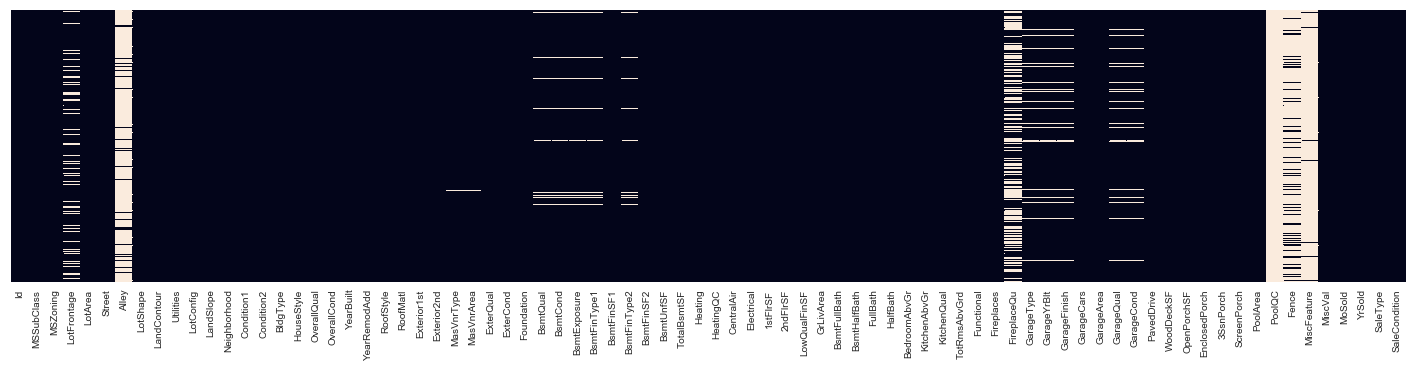

In [12]:
na_heatmap( train_X )

The features for `Alley`, `FireplaceQu`, `PoolQC`, `Fence`, and `MiscFeature` is missing most of the data so it is best to drop these features.

###### Function

In [13]:
def drop_missing_features( df ):
    drop_columns = []
    na_count     = df.isna().sum()

    for i in range( len( na_count ) ):
        if ( na_count[i] / len( df ) ) > 0.4:
            drop_columns.append( df.columns[i] )
            
    return drop_columns

In [14]:
train_X.drop( drop_missing_features( train_X ), axis = 1, inplace = True )

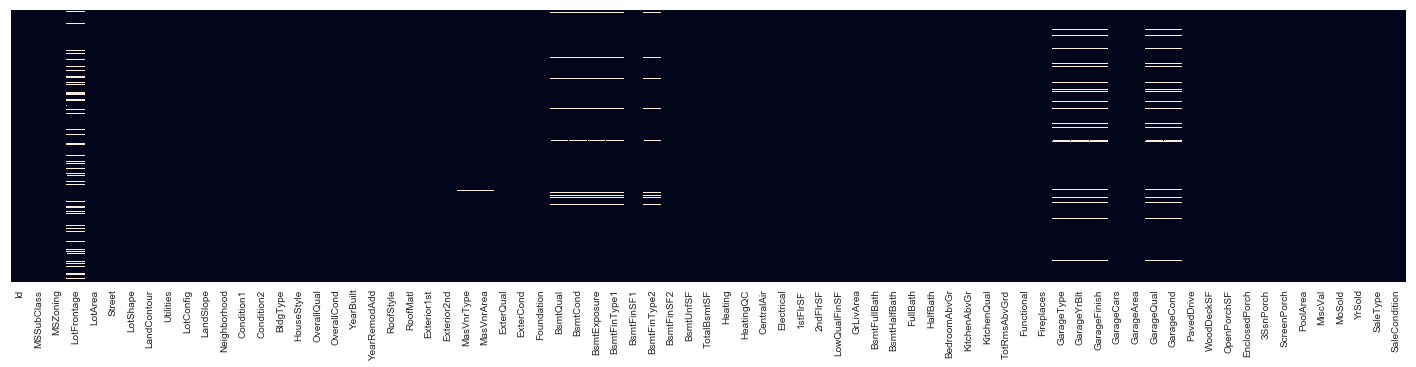

In [15]:
na_heatmap( train_X )

##### Get Data Types of Variables

###### Function

In [16]:
def get_data_types( df ):
    data_types = []

    for i in range( len( train_X.columns ) ):
        data_types.append( str( train_X.columns[i] ) + " " + str( train_X[ train_X.columns[i] ].dtype ) )
        data_types[ i ] = data_types[ i ].split(" ")

    data_types = pd.DataFrame( data_types )
    return data_types.transpose()

In [17]:
get_data_types( train_X )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,object


##### Get Numeric Indices

###### Function

In [18]:
def get_numeric_indices( df ):
    indices = []

    for i in range( 1, len( df.columns ) ):
        if df[ df.columns[i] ].dtype == 'int64' or\
           df[ df.columns[i] ].dtype == 'float64':
            indices.append(i)
            
    return indices

In [19]:
numerical_indices = get_numeric_indices( train_X )

##### Impute Feature with Missing Values

###### Function

In [20]:
def impute_numeric( df, indices ):
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Numeric
        if i in indices:
            # Fill Missing Values with that Column's Mean
            column_mean = df[ df.columns[i] ].mean()
            df[ df.columns[i] ].fillna( column_mean, inplace = True )

In [21]:
impute_numeric( train_X, numerical_indices )

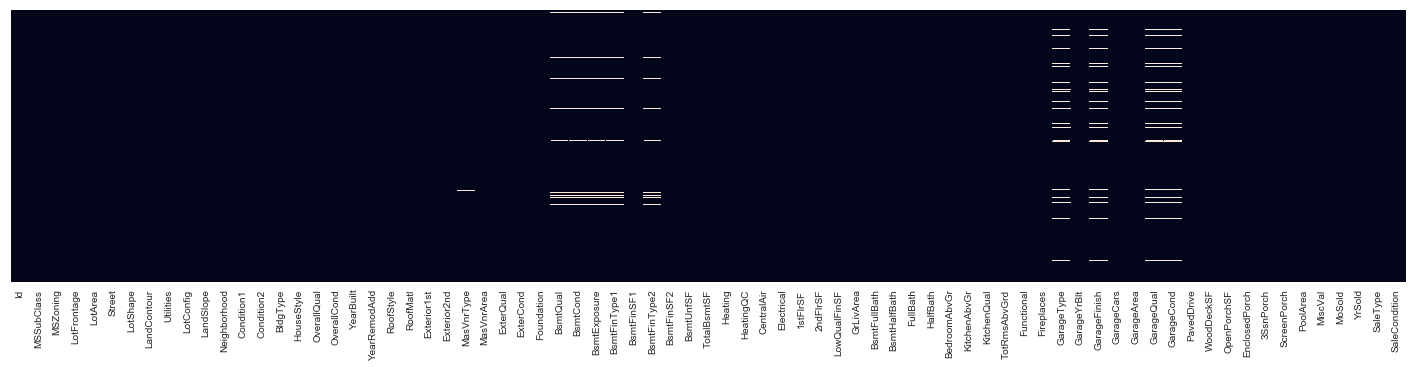

In [22]:
na_heatmap( train_X )

At this point all missing values for the numeric features have been imputed to be the mean value of all that feature's observations.

##### Drop Categorical Features with Majority Class 

###### Function

In [23]:
def get_categorical_indices( df ):
    indices = []

    for i in range( 1, len( df.columns ) ):
        if df[ df.columns[i] ].dtype == 'object':
            indices.append(i)
            
    return indices

In [24]:
categorical_indices = get_categorical_indices( train_X )

###### Function

In [25]:
def drop_majority_class_columns( df, indices ):
    class_count  = None
    drop_columns = []

    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Categorical
        if i in indices:
            # Get Count of Feature's Each Unique Value
            drop_feature = False
            class_count  = df[ df.columns[i] ].value_counts()

            # For Every Unique Value
            for j in range( len( class_count ) ):
                # If the Unique Value is the Majority
                if ( class_count[j] / len( df ) ) > .9:
                    # Drop the Feature Altogether
                    drop_feature = True
                    
            if drop_feature:
                drop_columns.append( df.columns[i] )
                
    return drop_columns

In [26]:
train_X.drop( drop_majority_class_columns( train_X, categorical_indices ), axis = 1, inplace = True )

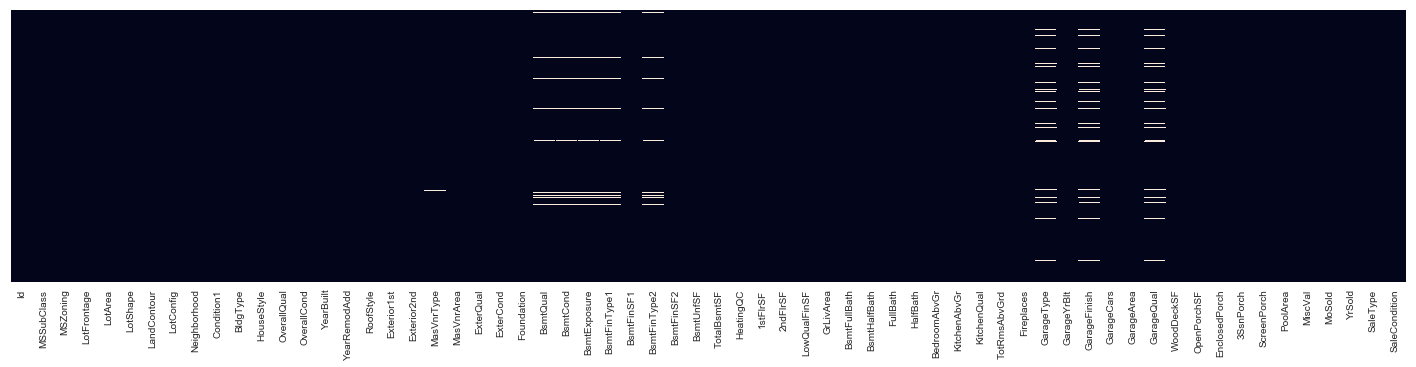

In [27]:
na_heatmap( train_X )

##### Impute Missing Categorical Data

In [28]:
train_X.fillna( 'Other', inplace = True )

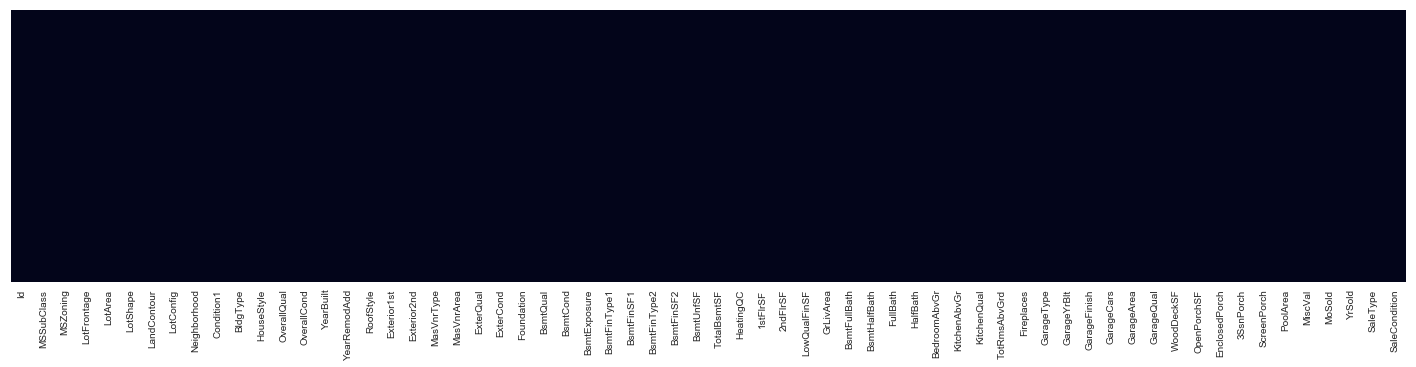

In [29]:
na_heatmap( train_X )

At this point all missing values have been accounted for.

## Transform Test Data

##### Winsorize Data

###### Function

In [30]:
def winsor( df, indices, exempt_features ):
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Numeric
        if i in indices and\
            df.columns[i] not in exempt_features:
                X_j                 = df[ df.columns[i] ]
                std_cutoff          = np.mean( X_j ) + ( 3 * np.std( X_j ) )
                sort_X_j            = X_j.sort_values( ascending = False )
                count_over_3_std    = len( sort_X_j[ sort_X_j > std_cutoff ] )
                perc_outside_3_std  = count_over_3_std / len( X_j )
                df[ df.columns[i] ] = stats.mstats.winsorize( X_j, limits = [0, perc_outside_3_std] )
                
                
def before_after_winsor( df, indices ):
    range_vector = []
    max_value    = 0
    min_value    = 0
    
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Numeric
        if i in indices:
            max_value = max( df[ df.columns[i] ] )
            min_value = min( df[ df.columns[i] ] )
            
            range_vector.append( max_value - min_value )
    
    return range_vector

I am going to compare the range difference between the before and after winsorization for the numerical feature values in the data. 

In [31]:
exempt_features = [ 'Id', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold' ]

In [32]:
after_df          = train_X.copy( deep = True )
numerical_indices = get_numeric_indices( after_df )

In [33]:
winsor( after_df, numerical_indices, exempt_features )

By looking at the table it is evident that the range of values have been brought closer to a normal distribution. Some features were disregarded like features involving years.

In [34]:
train_X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


###### Function

In [35]:
def winsor_before_after_compare( df_1, df_2, indices ):
    before_winsor        = before_after_winsor( df_1, indices )
    after_winsor         = before_after_winsor( df_2, indices )
    before_after         = pd.DataFrame( [before_winsor, after_winsor], index = [ "Before", "After" ] )
    before_after.columns = df_1.columns[ indices ][ 0 : len( df_1.columns[ indices ] ) ]
    return before_after

In [36]:
winsor_before_after_compare( train_X, after_df, numerical_indices )

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Before,170,292.0,213945,9,8,138,60,1600.0,5644,1474,2336,6110,4358,2065,572,5308,3,2,3,2,8,3,12,3,110.0,4,1418,857,547,552,508,480,738,15500,11,4
After,160,113.0,38794,9,7,138,60,640.0,1880,506,1869,2330,2030,1611,144,2752,1,0,3,2,5,1,10,2,110.0,4,1069,468,244,205,23,182,0,1400,11,4


Selected Features Not Benefitting from Winsorization are:

 - `OverallQual`
 - `OverallCond`
 - `BsmtFullBath`
 - `BsmtHalfBath`
 - `FullBath`
 - `HalfBath`
 - `BedroomAbvGr`
 - `KitchenAbvGr`
 - `TotRmsAbvGrd`
 - `Fireplaces`
 - `GarageCars`
 - `PoolArea` 
 - `3SsnPorch`
 
So it will be best to avoid these features by redefining the exept features list.

In [37]:
exempt_features = [ 'Id', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold' ] +\
                  [ 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', '3SsnPorch' ]

In [38]:
after_df = train_X.copy( deep = True )

In [39]:
winsor( after_df, numerical_indices, exempt_features )

In [40]:
winsor_before_after_compare( train_X, after_df, numerical_indices )

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Before,170,292.0,213945,9,8,138,60,1600.0,5644,1474,2336,6110,4358,2065,572,5308,3,2,3,2,8,3,12,3,110.0,4,1418,857,547,552,508,480,738,15500,11,4
After,160,113.0,38794,9,8,138,60,640.0,1880,506,1869,2330,2030,1611,144,2752,3,2,3,2,8,3,12,3,110.0,4,1069,468,244,205,508,182,738,1400,11,4


This looks like it will be better to standardize now.

In [41]:
winsor( train_X, numerical_indices, exempt_features )

##### Standardize Numeric Variable

###### Function

In [42]:
def standard_scale( df, indices ):
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Numeric
        if i in indices and\
            df.columns[i] not in [ 'Id', 'YearBuilt', 'YearRemodAdd', 'YrSold' ]:
                X_j = df[ df.columns[i] ]
                df[ df.columns[i] ] = ( X_j - X_j.mean() ) /\
                                      ( X_j.max() - X_j.min() )

In [43]:
standard_scale( train_X, numerical_indices )

In [44]:
train_X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000
mean,730.500000,8.942618e-17,1.884375e-15,6.257183e-18,1.946692e-17,6.478836e-17,1971.267808,1984.865753,-3.220407e-17,7.357129e-18,3.893385e-17,2.507507e-17,-3.802134e-18,-3.345878e-18,2.307895e-17,-4.532143e-17,-1.998972e-17,-3.383899e-18,-9.139379e-18,3.805936e-17,1.726169e-17,1.288923e-17,3.126067e-17,-1.790805e-17,-5.619554e-17,8.581891e-16,7.551037e-17,-9.353249e-18,5.497885e-17,2.560737e-17,-5.924675e-17,1.644423e-18,1.807915e-17,4.815462e-17,-1.806013e-17,4.022895e-17,2007.815753
std,421.610009,2.604545e-01,1.721722e-01,1.341795e-01,1.536663e-01,1.390999e-01,30.202904,20.645407,2.480336e-01,2.311657e-01,2.349517e-01,2.342906e-01,1.753751e-01,1.815528e-01,2.694276e-01,1.238121e-01,1.801754e-01,1.729702e-01,1.193763e-01,1.836386e-01,2.514427e-01,1.019723e-01,7.344607e-02,1.354494e-01,2.148888e-01,2.181326e-01,1.868288e-01,1.968239e-01,2.547650e-01,2.453806e-01,2.627858e-01,5.771128e-02,2.407626e-01,5.444080e-02,1.073986e-01,2.457842e-01,1.328095
min,1.000000,-2.293236e-01,-4.301669e-01,-2.265142e-01,-5.665906e-01,-5.719178e-01,1872.000000,1950.000000,-1.544044e-01,-2.342692e-01,-7.470220e-02,-3.028460e-01,-4.515286e-01,-4.064114e-01,-2.149188e-01,-1.634798e-02,-4.268925e-01,-1.417808e-01,-2.876712e-02,-5.216895e-01,-1.914384e-01,-3.583048e-01,-3.488584e-01,-3.764840e-01,-2.043379e-01,-7.136924e-01,-4.417808e-01,-4.415226e-01,-1.980169e-01,-1.853834e-01,-9.858002e-02,-6.711789e-03,-6.901249e-02,-3.738352e-03,-1.804990e-02,-4.838107e-01,2006.000000
25%,365.750000,-2.293236e-01,-8.503418e-02,-6.531657e-02,-1.221461e-01,-7.191781e-02,1954.000000,1967.000000,-1.544044e-01,-2.342692e-01,-7.470220e-02,-1.835309e-01,-1.100050e-01,-1.364606e-01,-2.149188e-01,-1.634798e-02,-1.378300e-01,-1.417808e-01,-2.876712e-02,-1.883562e-01,-1.914384e-01,-1.083048e-01,-1.552511e-02,-1.264840e-01,-2.043379e-01,-1.500560e-01,-1.917808e-01,-1.286134e-01,-1.980169e-01,-1.853834e-01,-9.858002e-02,-6.711789e-03,-6.901249e-02,-3.738352e-03,-1.804990e-02,-1.201743e-01,2007.000000
50%,730.500000,-4.182363e-02,3.903503e-03,-1.569550e-02,-1.103501e-02,-7.191781e-02,1973.000000,1994.000000,-1.544044e-01,-3.027980e-02,-7.470220e-02,-4.736179e-02,-2.599212e-02,-3.547540e-02,-2.149188e-01,-1.634798e-02,-1.628206e-02,-1.417808e-01,-2.876712e-02,1.449772e-01,-1.914384e-01,1.669521e-02,-1.552511e-02,-4.315068e-02,1.289954e-01,0.000000e+00,5.821918e-02,7.495163e-03,-1.980169e-01,-8.292443e-02,-9.858002e-02,-6.711789e-03,-6.901249e-02,-3.738352e-03,-1.804990e-02,-2.926526e-02,2008.000000
75%,1095.250000,8.317637e-02,8.310741e-02,3.902946e-02,1.000761e-01,5.308219e-02,2000.000000,2004.000000,1.022362e-01,1.445872e-01,-7.470220e-02,1.294707e-01,1.056602e-01,1.144014e-01,2.369744e-01,-1.634798e-02,9.736257e-02,1.915525e-01,-2.876712e-02,1.449772e-01,3.085616e-01,1.669521e-02,-1.552511e-02,4.018265e-02,1.289954e-01,2.044894e-01,5.821918e-02,9.729872e-02,1.609574e-01,9.330508e-02,-9.858002e-02,-6.711789e-03,-6.901249e-02,-3.738352e-03,-1.804990e-02,1.525529e-01,2009.000000
max,1460.000000,7.706764e-01,5.698331e-01,7.734858e-01,4.334094e-01,4.280822e-01,2010.000000,2010.000000,8.455956e-01,7.657308e-01,9.25

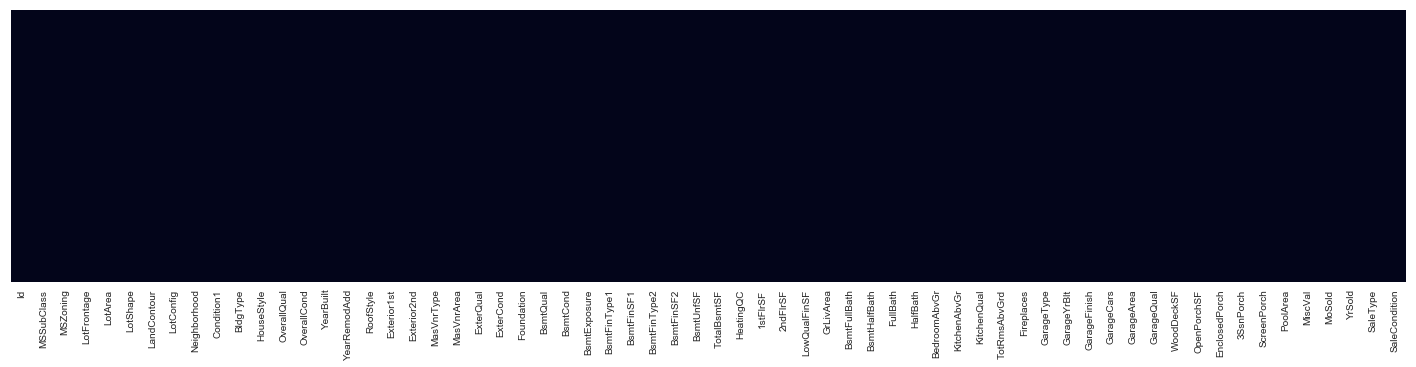

In [45]:
na_heatmap( train_X )

##### Make Categorical Features Dummy Variables

###### Function

In [46]:
def make_dummy_features( df, indices ):
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Feature is Categorical
        if i in indices:
            # Make Feature a Dummy Variable
            df[ df.columns[i] ] = pd.get_dummies( df[ df.columns[i] ], drop_first = True )

In [47]:
categorical_indices = get_categorical_indices( train_X )

In [48]:
make_dummy_features( train_X, categorical_indices )

## Feature Selection Using Elastic Net

## Prepare Test Data

###### Data Cleansing
- Drop features with a majority missing values
- Impute numerical missing values as mean of feature missing value appears under
- Drop categorical variables where the majority of its observations are of a single category
- Impute the categorical feature values as a new categroy called `Other`

###### Data Standardization
- Winsorize numerical data
- Standardize the numerical data
- Transform categorical features into dummy variables

In [49]:
test_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [50]:
test_X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [51]:
test_X.drop( drop_missing_features( test_X ), axis = 1, inplace = True )

In [52]:
numerical_indices = get_numeric_indices( test_X )
impute_numeric( test_X, numerical_indices )

In [53]:
categorical_indices = get_categorical_indices( test_X )
test_X.drop( drop_majority_class_columns( test_X, categorical_indices ), axis = 1, inplace = True )

In [54]:
test_X.fillna( 'Other', inplace = True )

In [55]:
numerical_indices = get_numeric_indices( test_X )
exempt_features   = [ 'Id', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold' ] +\
                    [ 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', '3SsnPorch' ]
winsor( test_X, numerical_indices, exempt_features )

In [56]:
standard_scale( test_X, numerical_indices )

In [57]:
categorical_indices = get_categorical_indices( test_X )
make_dummy_features( test_X, categorical_indices )

In [58]:
test_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,-0.219873,0,0.106578,0.084988,0,0,0,0,1,0,0,-0.119869,0.055775,1961,1961,1,0,0,0,-0.154741,0,0,1,0,0,0,0,0.018310,0,0.182379,-0.153291,-0.069240,0,-0.132547,-0.207422,-0.009355,-0.239353,-0.144818,-0.032601,-0.142735,-0.188828,-0.142335,-0.021247,0,-0.115433,-0.145305,1,-0.053594,0,-0.153224,0.232531,0,0,0.102825,-0.184287,-0.099231,-0.004984,0.577556,-0.00218,-0.019038,-0.009471,2010,0,0
1,1462,-0.219873,0,0.115753,0.199480,0,0,0,0,0,0,0,-0.008758,0.055775,1958,1958,0,0,0,1,0.019172,0,0,1,0,0,0,0,0.277126,0,-0.077081,-0.079817,0.123432,0,0.091689,-0.207422,-0.009355,-0.062474,-0.144818,-0.032601,-0.142735,0.311172,0.024332,-0.021247,0,-0.032100,-0.145305,1,-0.063209,0,-0.153224,-0.144046,0,0,0.636580,-0.042554,-0.099231,-0.004984,-0.081785,-0.00218,0.980962,-0.009471,2010,0,0
2,1463,0.015422,0,0.051532,0.180564,0,0,0,0,0,0,0,-0.119869,-0.069225,1997,1998,1,0,0,0,-0.154741,0,0,0,0,0,0,0,0.202041,0,-0.077081,-0.225144,-0.049412,0,-0.115975,0.239930,-0.009355,0.060075,-0.144818,-0.032601,0.107265,0.311172,0.024332,-0.021247,0,-0.032100,0.104695,1,0.061791,0,0.046776,0.009107,0,0,0.254723,-0.050428,-0.099231,-0.004984,-0.081785,-0.00218,-0.019038,-0.282198,2010,0,0
3,1464,0.015422,0,0.088230,0.013825,0,0,0,0,0,0,0,-0.008758,0.055775,1998,1998,1,0,0,1,-0.122535,0,0,0,0,0,0,0,0.094533,0,-0.077081,-0.124117,-0.050274,0,-0.117011,0.225252,-0.009355,0.049863,-0.144818,-0.032601,0.107265,0.311172,0.024332,-0.021247,0,0.051234,0.104695,1,0.064996,0,0.046776,-0.001703,0,0,0.566960,-0.042554,-0.099231,-0.004984,-0.081785,-0.00218,-0.019038,-0.009471,2010,0,0
4,1465,0.368363,0,-0.232871,-0.201438,0,1,0,0,0,0,0,0.213464,-0.069225,1992,1992,1,0,0,0,-0.154741,0,0,0,0,0,0,0,-0.098300,0,-0.077081,0.250275,0.102312,0,0.066314,-0.207422,-0.009355,-0.082490,-0.144818,-0.032601,0.107265,-0.188828,-0.142335,-0.021247,0,-0.115433,-0.145305,1,0.045765,0,0.046776,0.030729,0,0,-0.192534,0.138548,-0.099231,-0.004984,0.709424,-0.00218,-0.019038,-0.464016,2010,0,0


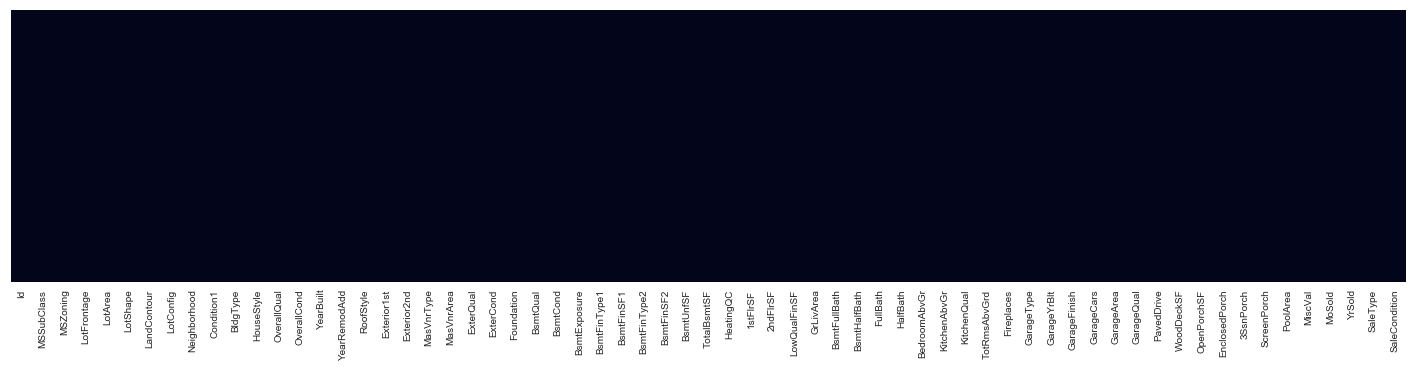

In [59]:
na_heatmap( test_X )

## Fit Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [62]:
lm.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
print( test_X.shape )
print( train_X.shape )

(1459, 65)
(1460, 64)


In [64]:
list( set(test_X.columns) - set(train_X.columns) )

['PavedDrive']

In [65]:
test_X.drop( [ 'PavedDrive' ], axis = 1, inplace = True )

In [66]:
print( test_X.shape )
print( train_X.shape )

(1459, 64)
(1460, 64)


In [67]:
predictions = lm.predict( test_X )

## Fit Gradient Bosting Model

## Create Submission

In [90]:
submission = pd.DataFrame(
    {'Id'        : test_X[ 'Id' ],
     'SalePrice ': predictions
    }
)

submission.to_csv( './submissions/submission.csv', sep = ',')

In [91]:
submission.head(10)

,Id,SalePrice
0,1461,117685.539875
1,1462,165413.610606
2,1463,184309.661247
3,1464,196040.282256
4,1465,206847.347341
5,1466,177481.933865
6,1467,199802.405371
7,1468,165345.715991
8,1469,227887.531916
9,1470,115872.185429
